<div style="background-color: #FCF6F5; border: 2px solid #ccc; padding: 8px; text-align: center;">
    <h1 style="color: #990011; margin: 8px 0;">Laptop Specs by Rating and Price - Exploratory and Inferential Data Analysis</h1>
    <p style="color: #990011; font-size: 20px; margin: 5px 0 0;">
        Dataset: 
        <a href="https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list?select=Cleaned_Laptop_data.csv " style="color: #0066cc; text-decoration: none;">
            https://www.kaggle.com/datasets/kuchhbhi/latest-laptop-price-list?select=Cleaned_Laptop_data.csv 
        </a>
        <br>
        Chris Heimbuch: 
        <a href="https://github.com/chrisheimbuch" style="color: #0066cc; text-decoration: none;">
            https://github.com/chrisheimbuch
        </a>
    </p>
</div>

![laptopIntro.jpg](./images/laptopIntro.jpg)

[Image link](https://www.gizmogo.com/blog/wp-content/uploads/2024/05/which-brand-of-laptop-is-best-for-gaming-1024x597.jpg)

<div style="background-color: #FCF6F5; border: 2px solid #ccc; padding: 20px;">
    <h2 style="color: #990011; margin: 8px 0; text-decoration: underline;"><b>Overview</b></h2>
    <p style="color: black;">This dataset is scraped from flipkart.com, and was gathered using an automated chrome web extension tool called Instant Data Scrapped.</p>
    <p style="color: black;">The columns that this dataset includes are:</p>
    <ul style="color: black;">
        <li><b style="color: #990011;">brand</b> - The name of the brand of laptop.</li>
        <li><b style="color: #990011;">model</b> - The model name/number associated with the laptop.</li>
        <li><b style="color: #990011;">processor_brand</b> - The brand of processor in the laptop such as AMD or Intel.</li>
        <li><b style="color: #990011;">processor_name</b> - The model name/number associated with a processor.</li>
        <li><b style="color: #990011;">processor_gnrtn</b> - The generational version of a processor.</li>
        <li><b style="color: #990011;">ram_gb</b> - How much RAM is in a particular laptop model.</li>
        <li><b style="color: #990011;">ram_type</b> - What type of RAM is in a laptop, for example DDR3 or DDR4.</li>
        <li><b style="color: #990011;">ssd</b> - Indicating if a Solid State Drive storage is in a laptop, and how much in Gigabytes.</li>
        <li><b style="color: #990011;">hdd</b> - Indicating if a Hard Disk Drive storage is in a laptop, and how much in Gigabytes.</li>
        <li><b style="color: #990011;">os</b> - The operating system on the laptop.</li>
        <li><b style="color: #990011;">os_bit</b> - The operating system bit that's on a laptop (such as 32 or 64 bit Windows).</li>
        <li><b style="color: #990011;">graphic_card_gb</b> - How much video random access memory a graphic card has.</li>
        <li><b style="color: #990011;">weight</b> - Weight of laptop.</li>
        <li><b style="color: #990011;">display_size</b> - How large a screen is for a respective laptop.</li>
        <li><b style="color: #990011;">warranty</b> - How many years of active warranty a particular laptop has.</li>
        <li><b style="color: #990011;">touchscreen</b> - Indicator if a laptop has a touch screen.</li>
        <li><b style="color: #990011;">msoffice</b> - Indicator if a laptop comes with Microsoft Office.</li>
        <li><b style="color: #990011;">latest_price</b> - The latest price of the laptop in INR.</li>
        <li><b style="color: #990011;">old_price</b> - Old price of laptop if it was in the original dataset.</li>
        <li><b style="color: #990011;">discount</b> - Indicator if there is a difference between the old price and latest price.</li>
        <li><b style="color: #990011;">star_rating</b> - The overall rating of the laptop, from 1 star to 5 stars.</li>
        <li><b style="color: #990011;">ratings</b> - The count of ratings overall for a laptop.</li>
        <li><b style="color: #990011;">reviews</b> - Count of reviews for a laptop.</li>
    </ul>
    <p style="color: black;">For my analysis, Section 1 comprised of getting familiar with my data using some common techniques, such as inspecting the shape, getting the head of my dataframe by invoking the .head() method, checking for null values, using the describe technique and the .info() technique to understand data types. Next, I cleaned my data and added some new columns added some additional columns for USD pricing instead of INR pricing. Section 2 comprised of Descriptive Questions and answers via beautified graphical representations. Section 3 comprised of inferential analysis and hypothesis testing. Finally, Section 4 is analysis and conclusion of findings. This was a fun project and hope you enjoy! </p>
</div>

In [966]:
#Import libraries for analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from matplotlib.lines import Line2D 
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("Cleaned_Laptop_data.csv")
df.shape

(896, 23)

In [1019]:
#Inspect all columns
df.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ram_type', 'ssd', 'hdd', 'os', 'os_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'Touchscreen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'reviews'],
      dtype='object')

In [12]:
#Inspect head
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [83]:
#Inspect data types and potential null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [42]:
#Check for null values.
df.isna().sum()

brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            0
dtype: int64

In [1020]:
#Check out columns that have any meaningful numeric data.
df.describe()

,graphic_card_gb,warranty,latest_price,old_price,discount,star_rating,ratings,reviews
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,1.198661,0.691964,76309.860491,88134.154018,18.527902,2.980469,367.391741,46.152902
std,2.057454,0.606282,46613.354368,55719.645554,10.508486,1.965254,1106.309355,136.079586
min,0.000000,0.000000,13990.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,45490.000000,54940.500000,11.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,63494.000000,78052.500000,19.000000,4.100000,19.000000,3.000000
75%,2.000000,1.000000,89090.000000,111019.500000,26.000000,4.400000,179.500000,23.250000
max,8.000000,3.000000,441990.000000,377798.000000,57.000000,5.000000,15279.000000,1947.000000


In [344]:
#Creating copy of DF to work with.
df_copy = df.copy()

In [345]:
#Clean the ram_gb column

gb_replacement = {
    '4 GB GB': "4 GB",
    "8 GB GB": "8 GB",
    "16 GB GB": "16 GB",
    "32 GB GB": "32 GB"
}

df_copy['ram_gb'] = df_copy['ram_gb'].replace(gb_replacement)  


In [346]:
#Sanity Check
df_copy['ram_gb'].unique()

array(['4 GB', '8 GB', '32 GB', '16 GB'], dtype=object)

In [347]:
df_copy.head(30)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234
5,Avita,PURA,AMD,APU Dual,10th,8 GB,DDR4,256 GB,0 GB,Windows,...,14,0,No,No,24990,33490,25,3.7,1657,234
6,HP,APU,AMD,APU Dual,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,14,0,No,No,20900,22825,8,3.9,1185,141
7,Lenovo,APU,AMD,APU Dual,10th,4 GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,21896,0,0,3.9,219,18
8,HP,Athlon,AMD,Athlon Dual,10th,32 GB,DDR4,32 GB,0 GB,Windows,...,14,0,No,No,26899,27668,2,0.0,0,0
9,acer,Aspire,AMD,Athlon Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,...,Missing,1,No,No,31990,36990,13,4.2,76,13


In [348]:
#Add USD column for latest price and old price for USD
# https://www.xe.com/currencyconverter/ - source for converting as of 07/29/24

inrToUsd = 0.011939

df_copy['latest_price_usd'] = df_copy['latest_price'].map(lambda x: x * inrToUsd).round(2)
df_copy['old_price_usd'] = df_copy['old_price'].map(lambda x: x * inrToUsd).round(2)

In [349]:
#Rename some columns for interpretability.

rename_columns = {
    "ssd": "solid_state_drive",
    "hdd": "hard_disk_drive",
    "os": "operating_system",
    "processor_gnrtn": "processor_generation",
    "Touchscreen": "touch_screen",
    "os_bit": "operating_system_bit",
    "reviews": "review_count"
}

df_copy.rename(columns=rename_columns, inplace=True)

In [350]:
#Sanity check
df_copy.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_generation', 'ram_gb', 'ram_type', 'solid_state_drive',
       'hard_disk_drive', 'operating_system', 'operating_system_bit',
       'graphic_card_gb', 'weight', 'display_size', 'warranty', 'touch_screen',
       'msoffice', 'latest_price', 'old_price', 'discount', 'star_rating',
       'ratings', 'review_count', 'latest_price_usd', 'old_price_usd'],
      dtype='object')

In [351]:
#Clean up data in brands column so its all title case and not upper case or lowercase.
df_copy['brand'] = df_copy['brand'].map(lambda x: x.title())
df_copy['brand'].unique()

array(['Lenovo', 'Avita', 'Hp', 'Acer', 'Asus', 'Dell', 'Redmibook',
       'Realme', 'Infinix', 'Msi', 'Microsoft', 'Smartron', 'Lg', 'Nokia',
       'Apple', 'Vaio', 'Mi', 'Alienware', 'Iball', 'Samsung'],
      dtype=object)

In [360]:
#Update missing to say unknown model.
df_copy['model'] = df_copy['model'].replace("Missing", 'Unknown Model')

In [359]:
#Create dataframe with items i will only be working with.
columns = ['brand', 'model', 'processor_brand','processor_name','processor_generation','ram_gb', 'ram_type', 'solid_state_drive', 'hard_disk_drive', 'operating_system', 'graphic_card_gb', 'weight', 'warranty', 'star_rating', 'ratings', 'latest_price_usd', 'old_price_usd']

clean_df = df_copy[columns]
clean_df.head()

,brand,model,processor_brand,processor_name,processor_generation,ram_gb,ram_type,solid_state_drive,hard_disk_drive,operating_system,graphic_card_gb,weight,warranty,star_rating,ratings,latest_price_usd,old_price_usd
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB,DDR4,0 GB,1024 GB,Windows,0,ThinNlight,0,3.7,63,298.36,391.48
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB,DDR4,0 GB,512 GB,Windows,0,Casual,0,3.6,1894,233.89,254.60
2,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,238.66,334.17
3,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,128 GB,0 GB,Windows,0,ThinNlight,0,3.7,1153,256.57,334.17
4,Avita,PURA,AMD,APU Dual,10th,4 GB,DDR4,256 GB,0 GB,Windows,0,ThinNlight,0,3.7,1657,298.36,399.84


<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 2: Descriptive Questions
</div>

### 1. Which brands are rated the highest?

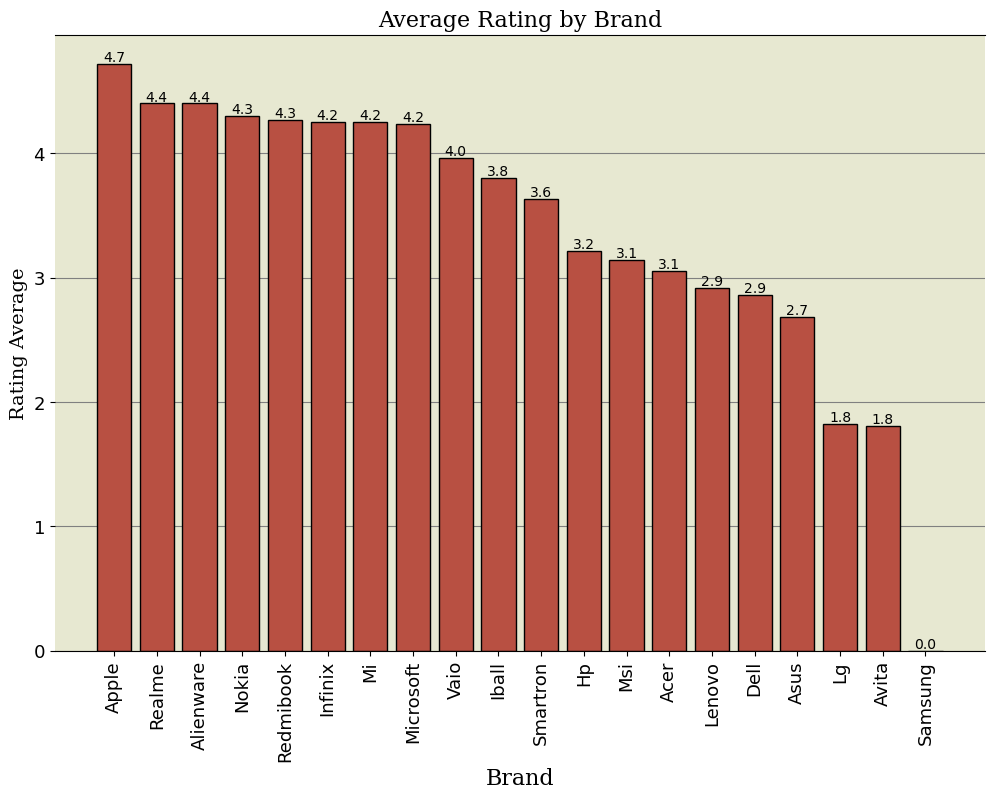

In [959]:
#Get average rating per brand, sort data for plotting.
average_ratings = clean_df.groupby('brand')['star_rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='star_rating', ascending=False)

font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}


# Plot the bar chart
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=average_ratings['brand'], height=average_ratings['star_rating'], color='#B85042', edgecolor='black', zorder=2)

#Set title, axis names, customize fonts.
ax.set_xlabel("Brand", fontdict=font1)
ax.set_ylabel("Rating Average", fontdict=font2)
ax.set_title("Average Rating by Brand", fontdict=font1)

#Customize graph
ax.grid(axis = 'y', color='grey')
ax.set_facecolor('#E7E8D1')
plt.xticks(rotation=90, ha='center', fontsize=13)
plt.yticks(fontsize=13)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

#Annotate each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + .11, 
        f'{height:.1f}', 
        ha='center', 
        va='top', 
        color='black', 
        fontsize=10)


plt.show()

### 2. Which brand is the most expensive?

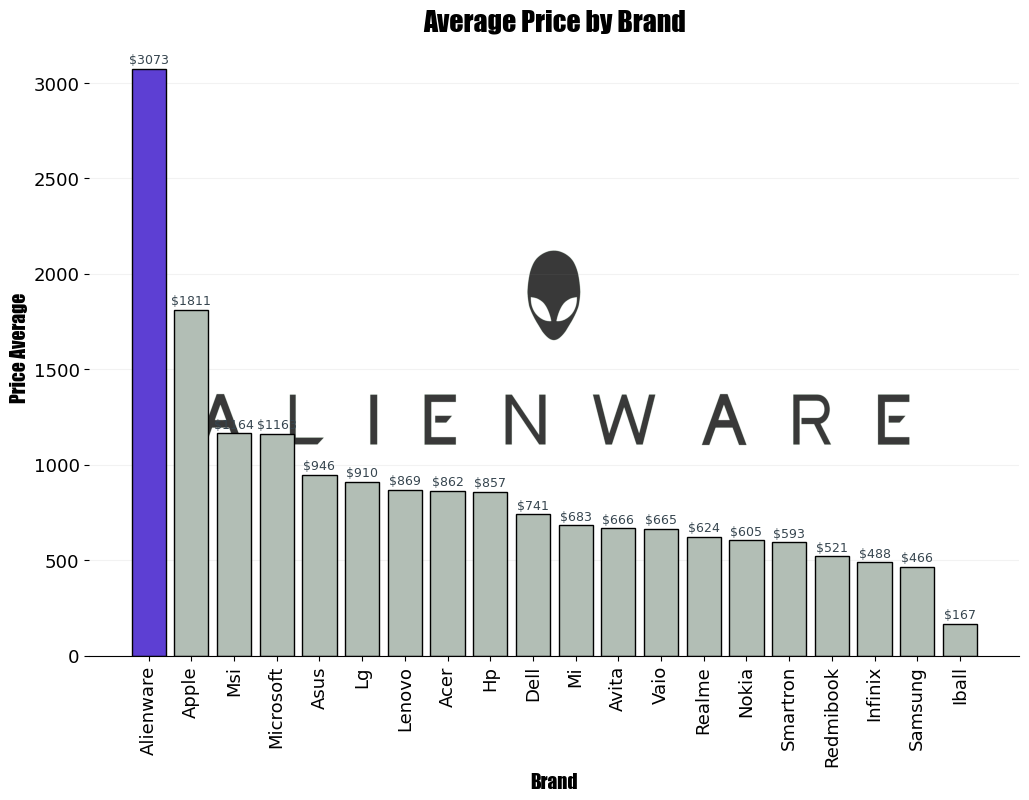

In [963]:
#Sort data for plotting.
average_price = clean_df.groupby('brand')['latest_price_usd'].mean().reset_index()
average_price = average_price.sort_values(by='latest_price_usd', ascending=False)

#Color mapping and font dictionaries for styling
color_mapping = ['#B2BEB5' for bar in range(20)]
color_mapping[0] = ('#5D3FD3')
font3 = {'family':'fantasy','color':'black','size':20}
font4= {'family':'fantasy','color':'black','size':14}

# Plot the bar chart.
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(x=average_price['brand'], height=average_price['latest_price_usd'], color=color_mapping, edgecolor='black', zorder=2)

#Set title, axis names, customize fonts.
ax.set_xlabel("Brand", fontdict=font4)
ax.set_ylabel("Price Average", fontdict=font4)
ax.set_title("Average Price by Brand", fontdict=font3)
plt.xticks(rotation=90, ha='center', fontsize=13)
plt.yticks(fontsize=13)

# Get the current axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

#Customize the graph, set image background
ax.grid(axis = 'y', color='grey', alpha=0.1)
background = plt.imread(r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_2\Phase 2 Project\images\Alienware-logo.png')
ax.imshow(background, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.9)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

#Bar annotations
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 80, 
        f'${height:.0f}', 
        ha='center', 
        va='top', 
        color='#36454F', 
        fontsize=9)



plt.show()

### 3. Are AMD or Intel processor laptops more expensive?

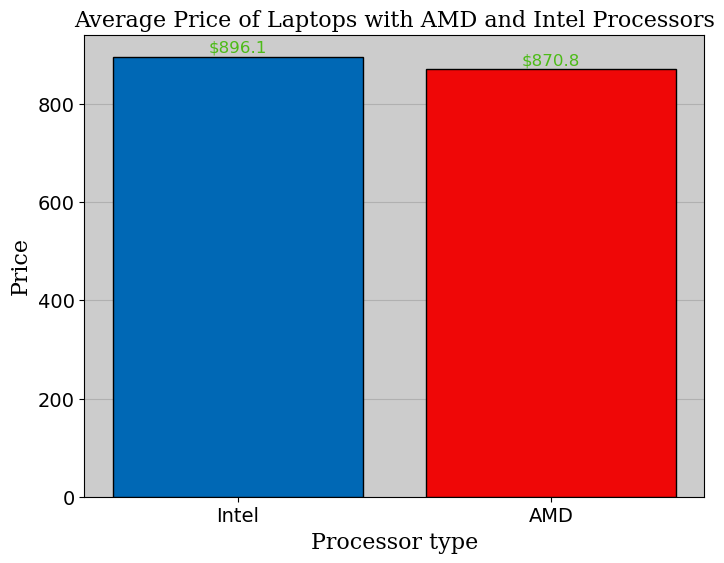

In [974]:
#Sort data for graphing
AMD_INTEL_MASK = (clean_df['processor_brand'] == "Intel") | (clean_df['processor_brand'] == "AMD")
amd_intel_df = clean_df[AMD_INTEL_MASK]
mean_amd_intel_df = amd_intel_df.groupby("processor_brand")['latest_price_usd'].mean().reset_index()

#Color map for both bars and color dictionary for fonts of axis.
color_mapping = ['#ef0707' for bar in range(2)]
color_mapping[1] = ('#0068B5')
font1 = {'family':'serif','color':'black','size':16}
font2 = {'family':'serif','color':'black','size':14}

#Set up graph, label the axis + title
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(data=mean_amd_intel_df, x=mean_amd_intel_df['processor_brand'], height=mean_amd_intel_df['latest_price_usd'], color=color_mapping, zorder=3, edgecolor="black", linewidth=1)
ax.set_xlabel("Processor type", fontdict=font1)
ax.set_ylabel("Price", fontdict=font1)
ax.set_title("Average Price of Laptops with AMD and Intel Processors", fontdict=font1)

#Further customize the graph by adjusting font size of ticks.
ax.grid(axis='y')
ax.invert_xaxis()
plt.xticks(ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.set_facecolor('#CCCCCC')

#Annotate the bars to add the average amount in USD.
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, 
        height + 34, 
        f'${height:.1f}', 
        ha='center', 
        va='top', 
        color='#4CBB17', 
        fontsize=12)

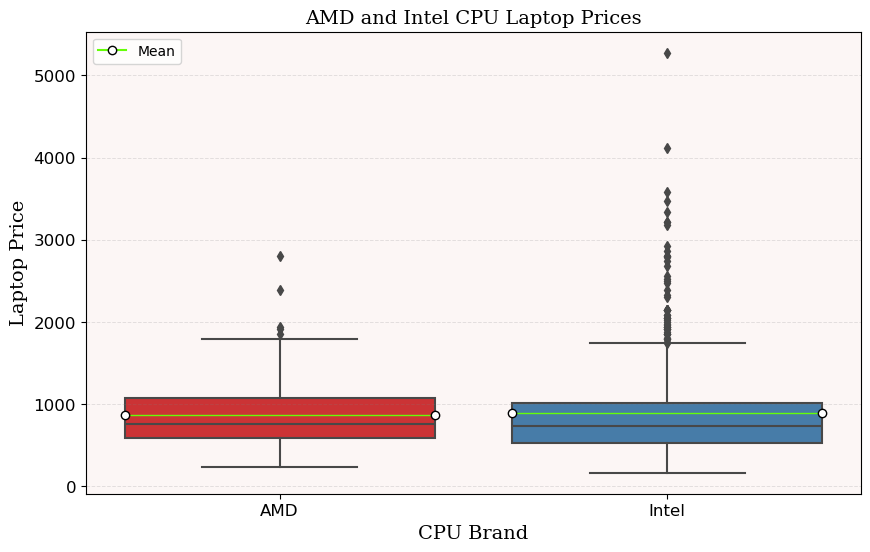

In [985]:
#set up Box plot visualization and plot it
plt.figure(figsize=(10, 6))
sns.boxplot(x='processor_brand', 
            y='latest_price_usd', 
            data=amd_intel_df, 
            palette="Set1",
            zorder=2,
            showmeans=True, 
            meanline=True, 
            meanprops={"marker":"o", "linestyle":"-", "color":"#65fe08",  "markerfacecolor":"white", "markeredgecolor":"black"}
            )

#Set axis names and title, customize fonts
plt.title('AMD and Intel CPU Laptop Prices', fontdict=font2)
plt.xlabel('CPU Brand', fontdict=font2)
plt.ylabel('Laptop Price',fontdict=font2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Set background of grid to custom color and add y-axis gridlines.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.2, zorder=1)

# Add custom legend for the mean line and add it to the plot
mean_line = Line2D([0], [0], color='#65fe08', marker='o', markerfacecolor='white', markeredgecolor='black', linestyle='-', label='Mean')
plt.legend(handles=[mean_line], loc='upper left')

plt.show()

### 4.	Which operating systems are rated the highest?

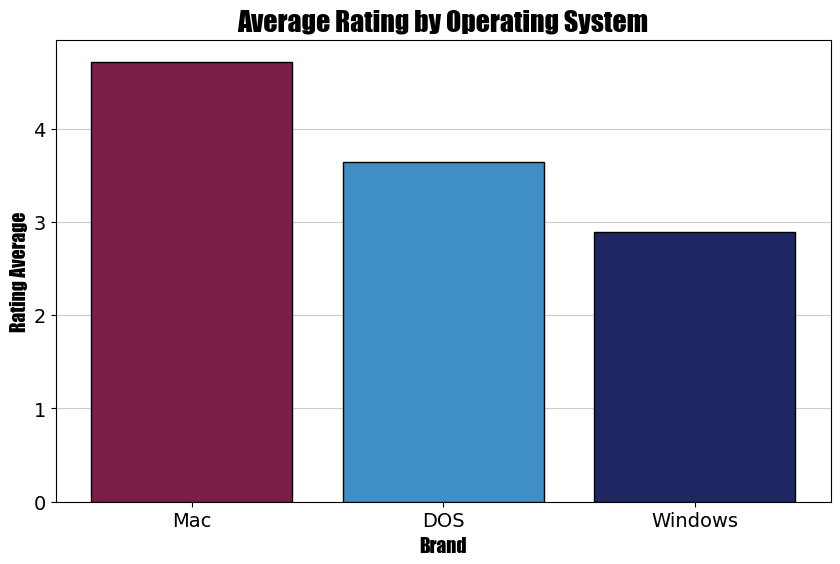

In [1000]:
#Sort data for plotting
os_ratings = clean_df.groupby("operating_system")['star_rating'].mean().reset_index()
os_ratings = os_ratings.sort_values(by='star_rating', ascending=False)

#color map
color_mapping = ['#1E2761' for bar in range(3)]
color_mapping[0] = ('#7A2048')
color_mapping[1] = ('#408EC6')

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x=os_ratings['operating_system'], height=os_ratings['star_rating'],color=color_mapping, edgecolor="black", zorder=3)

#Set axis and title
ax.set_xlabel("Brand", fontdict=font4)
ax.set_ylabel("Rating Average", fontdict=font4)
ax.set_title("Average Rating by Operating System", fontdict=font3)
plt.xticks(ha='center', fontsize=14)
plt.yticks(fontsize=14)
ax.grid(axis = 'y', color='grey', alpha=0.4)

plt.show()


### 5.	Of the top thirty models, which models are the most expensive?

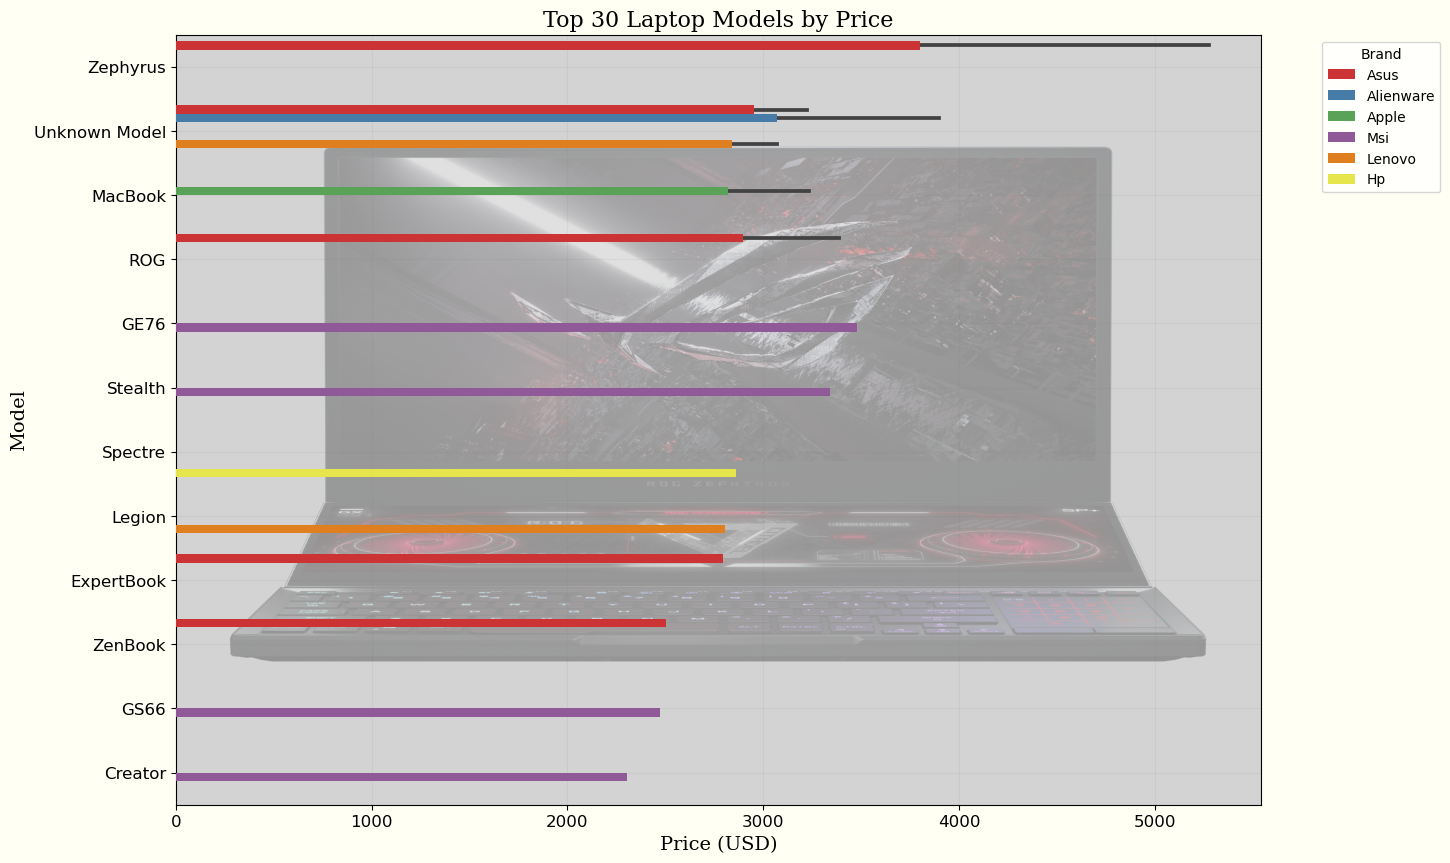

In [1044]:
#Sort Data for plotting
columns_models = ['brand','model','latest_price_usd']
model_brand_price = clean_df[columns_models].sort_values(by="latest_price_usd", ascending=False).head(30)

#Set up the plot and plot the bar plot.
fig, ax = plt.subplots(figsize=(14, 10), facecolor='#fffff4')
ax.set_facecolor('#D3D3D3')
ax = sns.barplot(x='latest_price_usd', y='model', hue='brand', data=model_brand_price, dodge=True, palette='Set1', zorder=3)

#Set axis names, title, axis tick sizes
plt.title('Top 30 Laptop Models by Price', fontdict=font1)
plt.xlabel('Price (USD)', fontdict=font2)
plt.ylabel('Model', fontdict=font2)
plt.xticks(ha='center', fontsize=12)
plt.yticks(fontsize=12)

# Get the current axis limits
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()

#Customize the graph, set image background
ax.grid(axis = 'both', color='grey', alpha=0.1)
background = plt.imread(r'C:\Users\Chris\Documents\Flatiron\Course Materials\Phase_2\Phase 2 Project\images\asusZephyrus.png')
ax.imshow(background, extent=[x_min, x_max, y_min, y_max], aspect='auto', alpha=0.3)


#Graph customizations
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 3: Inferential Questions Analysis
</div>

In [464]:
#Define function for testing our hypothesis.

def test_outcome(pvalue, alpha=0.05):
    if pvalue < alpha:
        return "Reject the null hypothesis."
    else:
        return "Fail to reject the null hypothesis."

#Creating sample for analysis.
df_sample_a = clean_df.sample(n=200, random_state=1)

#Slicing the sample to include only ratings that have merit (0.0 were null.)
good_rating_sample = df_sample_a[df_sample_a['star_rating'] > 0.0]
good_rating_df = clean_df[clean_df['star_rating'] > 0.0]

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    3.1 Let's check visually and run a Shapiro-Wilkes test to see if our data distribution is normal. 
</div>

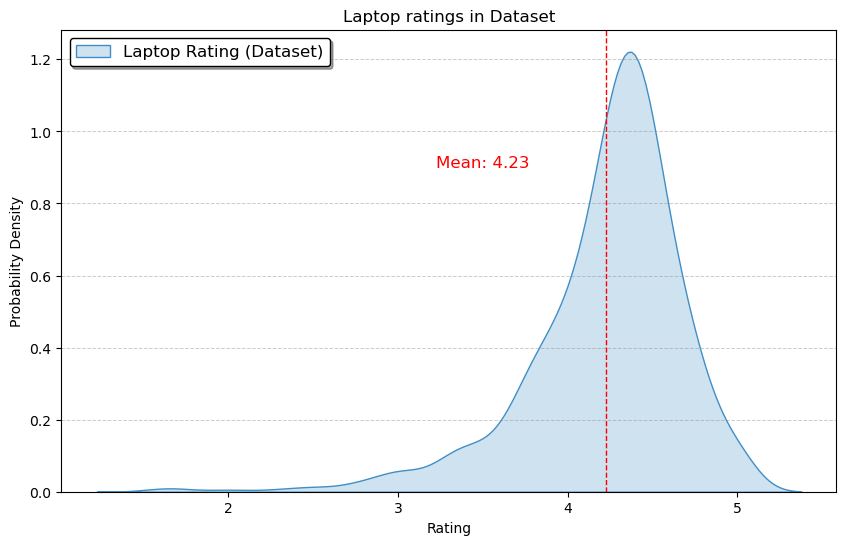

In [1065]:
#Inspected the Dataset to see how the rating data is distributed for ratings (data does not include 0 ratings).

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=good_rating_df, x="star_rating", color='#408EC6', label="Laptop Rating (Dataset)", fill=True)


#Labeling axes
plt.title("Laptop ratings in Dataset")
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)

# Add a vertical line at the mean
mean_points = good_rating_df['star_rating'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points - 1, 0.9, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

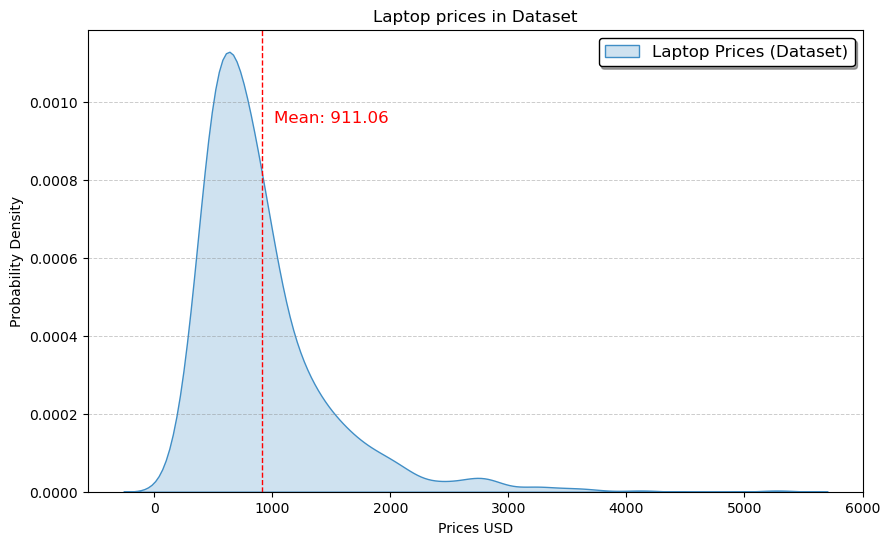

In [1071]:
#Inspected the Dataset to see how the laptop price data is distributed for price.

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=clean_df, x="latest_price_usd", color='#408EC6', label="Laptop Prices (Dataset)", fill=True)


#Labeling axes
plt.title("Laptop prices in Dataset")
plt.xlabel('Prices USD')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)

# Add a vertical line at the mean
mean_points = clean_df['latest_price_usd'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points + 100, plt.gca().get_ylim()[1] * 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [461]:
df_sample_a['star_rating'].value_counts()


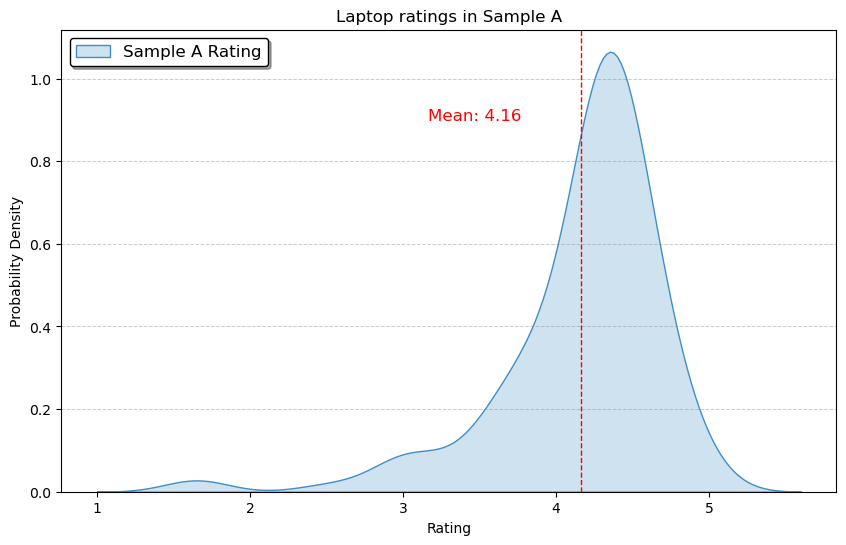

In [1072]:
#Inspecting the sample to see how the rating data is distributed for ratings, does not include 0.0 ratings. - Matches up very close to the dataset.

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=good_rating_sample, x="star_rating", color='#408EC6', label="Sample A Rating", fill=True)

#Labeling axes
plt.title("Laptop ratings in Sample A")
plt.xlabel('Rating')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)

# Add a vertical line at the mean
mean_points = good_rating_sample['star_rating'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points - 1, 0.9, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper left', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

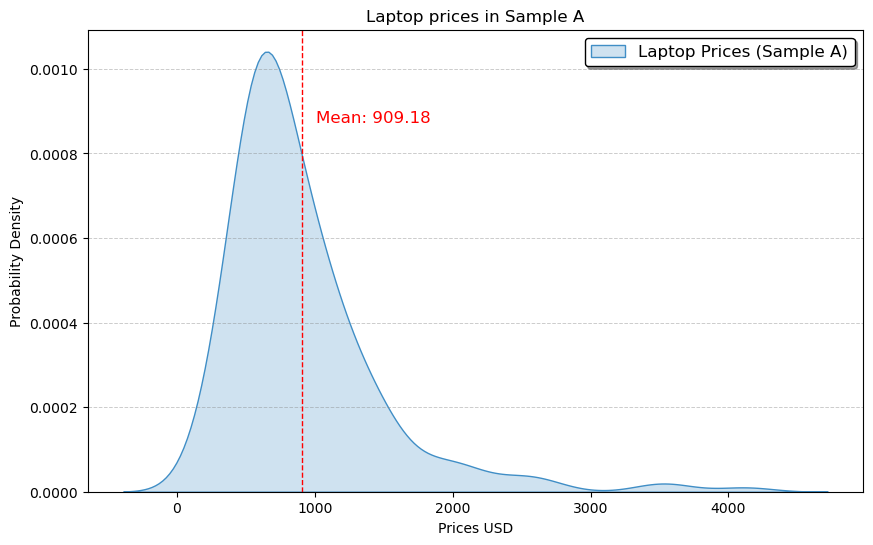

In [1070]:
#Inspected the sample to see how the laptop price data is distributed for price. - Matches up very close to the dataset.

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=df_sample_a, x="latest_price_usd", color='#408EC6', label="Laptop Prices (Sample A)", fill=True)

#Labeling axes
plt.title("Laptop prices in Sample A")
plt.xlabel('Prices USD')
plt.ylabel('Probability Density')
plt.grid(axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.4)


# Add a vertical line at the mean
mean_points = df_sample_a['latest_price_usd'].mean()
plt.axvline(mean_points, color='red', linestyle='--', linewidth=1)
plt.text(mean_points + 100, plt.gca().get_ylim()[1] * 0.8, f'Mean: {mean_points:.2f}', color='red', fontsize=12)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [467]:
#Performing normality test for ratings.

stat, p_val = stats.shapiro(good_rating_sample['star_rating'])
p_val

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')


Sample does not look Gaussian (reject H0)


In [416]:
#Performing normality test for price.

stat, p_val = stats.shapiro(df_sample_a['latest_price_usd'])
p_val

# Interpret the results
alpha = 0.05
if p_val > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


### **<u>Interpretation</u>**

After examining the distribution of latest prices and ratings, we have a Non-Parametric distribution for our dataset (Non-Gaussian or non-normal), and therefore we will need to perform Nonparametric statistical significance tests such as Mann-Whitney U Test (Non Parametric version of Students T-Test) and Kruskal-Wallis H Test (Non Parametric version of ANOVA Test) 

### **<u>1. Is there a significant difference in the prices between laptops with different processor brands (e.g., Intel vs. AMD)? (Mann-Whitney U Test)</u>**

$H_0$: _There is no difference in price between laptops with different processor brands._

$H_1$: _There is a difference in price between laptops with different processor brands._

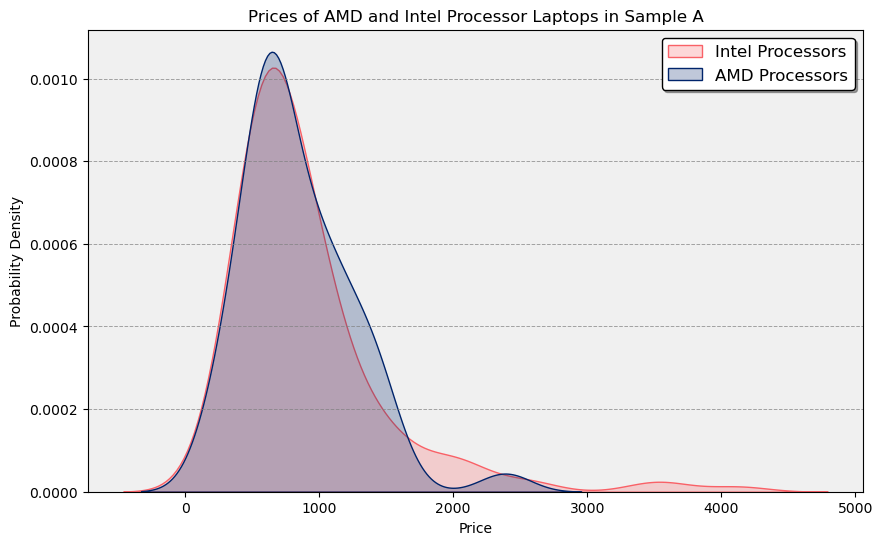

In [1047]:
sample_processor_intel = df_sample_a[df_sample_a['processor_brand'] == "Intel"]['latest_price_usd']
sample_processor_amd = df_sample_a[df_sample_a['processor_brand'] == "AMD"]['latest_price_usd']

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=sample_processor_intel, x=sample_processor_intel, color='#F96167', label="Intel Processors", fill=True)
sns.kdeplot(data=sample_processor_amd, x=sample_processor_amd, color='#00246B', label="AMD Processors", fill=True)

#Labeling axes
plt.title("Prices of AMD and Intel Processor Laptops in Sample A")
plt.xlabel('Price')
plt.ylabel('Probability Density')

ax = plt.gca()
ax.set_facecolor('#f0f0f0')

# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

In [505]:
#Interpret Results
stat, p_val = mannwhitneyu(sample_processor_intel, sample_processor_amd)
p_val

alpha = 0.05

test_outcome(p_val, alpha=alpha)

'Fail to reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that there is no significant difference between the means of price in each sample of laptops that have Intel processors and laptops that have AMD processors.


### **<u>2. Do laptops with solid-state drives (SSD's) have significantly different prices compared to those with hard disk drives (HDD's)? (Mann-Whitney U Test)</u>**

$H_0$: _There is no difference in price between laptops with SSD's compared to Laptops with HDD's._

$H_1$: _There is a difference in price between laptops with SSD's compared to Laptops with HDD's._

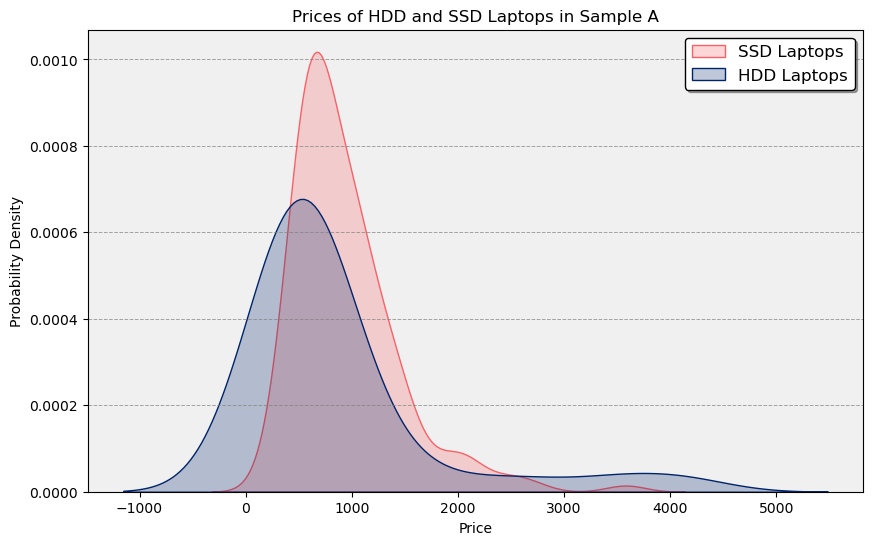

In [510]:
sample_ssd = df_sample_a[(df_sample_a['solid_state_drive'] != "0 GB") & (df_sample_a['hard_disk_drive'] == "0 GB")]['latest_price_usd']
sample_hdd = df_sample_a[(df_sample_a['solid_state_drive'] == "0 GB") & (df_sample_a['hard_disk_drive'] != "0 GB")]['latest_price_usd']

#Set up the plot
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=sample_ssd, x=sample_ssd, color='#F96167', label="SSD Laptops", fill=True)
sns.kdeplot(data=sample_hdd, x=sample_hdd, color='#00246B', label="HDD Laptops", fill=True)

#Labeling axes
plt.title("Prices of HDD and SSD Laptops in Sample A")
plt.xlabel('Price')
plt.ylabel('Probability Density')

ax = plt.gca()
ax.set_facecolor('#f0f0f0')


# Add legend
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7)
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')

plt.show()

#The KDE plot is assuming some negative values, despite there being no negative values.

In [507]:
stat, p_val = mannwhitneyu(sample_ssd, sample_hdd)
print(p_val)

alpha = 0.05

test_outcome(p_val, alpha=alpha)

0.0016371099590585666


'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that there is a statistically significant difference between the means of both samples of laptops that have SSD's and laptops that have hard disk drives and as a result, further research is warranted.


### **<u>3. Is there a significant difference in the prices of laptops based on their operating system? (Kruskal-Wallis H Test)</u>**

- $H_0$ : $\mu_{Windows} = \mu_{Mac} = \mu_{DOS}$

- $H_a$ : $H_0$ is not true

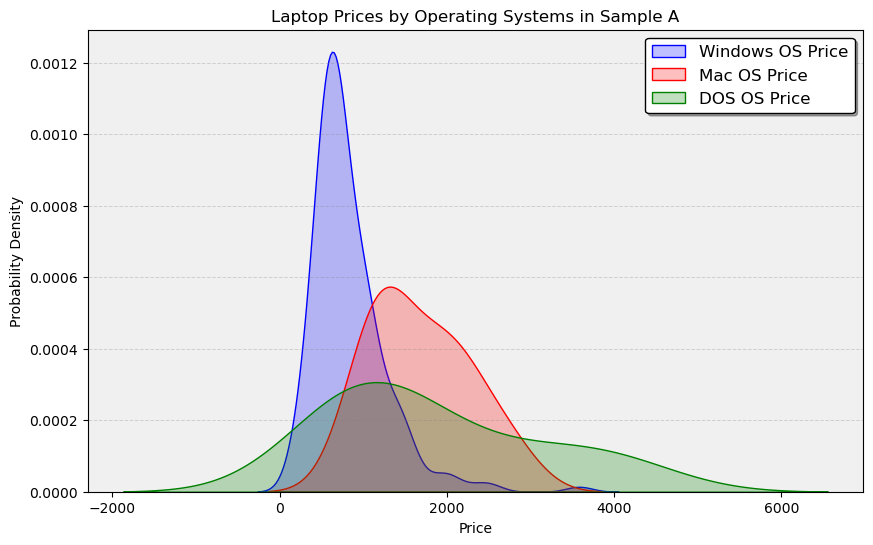

In [1051]:
#Data sorting for plotting.
windows_sample = df_sample_a[df_sample_a['operating_system'] == "Windows"]['latest_price_usd']
mac_sample = df_sample_a[df_sample_a['operating_system'] == "Mac"]['latest_price_usd']
dos_sample = df_sample_a[df_sample_a['operating_system'] == "DOS"]['latest_price_usd']

#Set up the plot.
plt.figure(figsize=(10, 6))

#KDE plot
sns.kdeplot(data=windows_sample, x=windows_sample, color='blue', label="Windows OS Price", fill=True)
sns.kdeplot(data=mac_sample, x=mac_sample, color='red', label="Mac OS Price", fill=True)
sns.kdeplot(data=dos_sample, x=dos_sample, color='green', label="DOS OS Price", fill=True)

#Labeling axes
plt.title("Laptop Prices by Operating Systems in Sample A")
plt.xlabel('Price')
plt.ylabel('Probability Density')

#Grid customization
ax = plt.gca()
ax.set_facecolor('#f0f0f0')
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.3)

# Add legend
plt.legend(loc='upper right', fontsize=12, frameon=True, fancybox=True, shadow=True, facecolor='white', edgecolor='black')


plt.show()

In [576]:
stat, p_value = kruskal(windows_sample, mac_sample, dos_sample)
p_value

test_outcome(p_value, alpha=alpha)

'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that our Null hypothesis was not true and there is a statistical significance between the means of each group, therefore warranting further research.

<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    3.2 Inferential Analysis via Central Limit Theorem (CLT)
</div>


### **<u>4. Is there a significant difference in the ratings between different brands, such as Asus and HP? (Independent Student T-Test)</u>**

$H_0$: _There is no difference between the ratings in different brand such as Asus and HP._

$H_1$: _There is a difference between the ratings in different brand such as Asus and HP._

In [579]:
#Create a function to easily create a sample of means to apply CLT.

def generate_sample_means(data, sample_size, num_samples):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    return sample_means

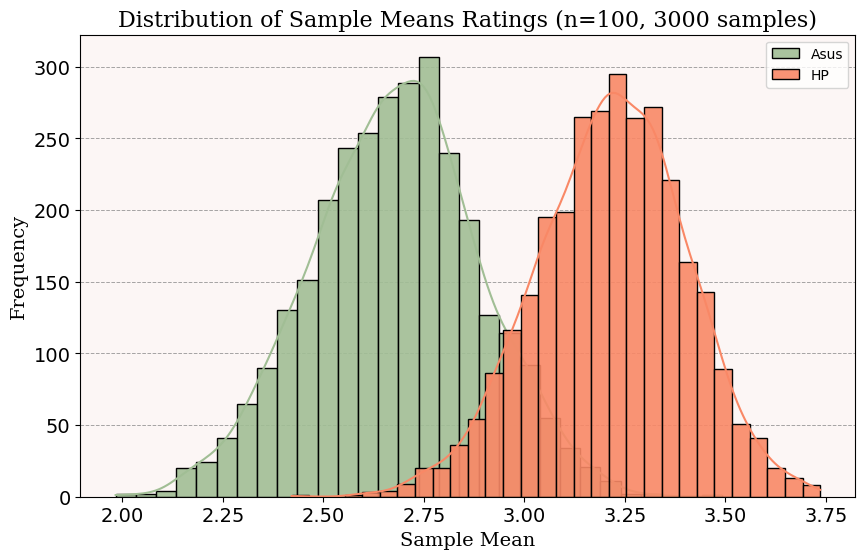

In [1053]:
#Slice main DF by each computer brand.
asus_df = clean_df[clean_df['brand'] == "Asus"]
hp_df = clean_df[clean_df['brand'] == "Hp"]

#Only include star ratings in stored variables.
asus_data = asus_df['star_rating'].values
hp_data = hp_df['star_rating'].values

# Parameters for sampling
sample_size = 100  
num_samples = 3000  

# Generate sample means
asus_sample_means = generate_sample_means(asus_data, sample_size, num_samples)
hp_sample_means = generate_sample_means(hp_data, sample_size, num_samples)

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(asus_sample_means, kde=True, color='#A1BE95', bins=30, label="Asus", alpha=0.9, zorder=2)
sns.histplot(hp_sample_means, kde=True, color='#F98866', bins=30, label="HP", alpha=0.9, zorder=2)

#Set title and axis, additional plot customization
plt.title(f'Distribution of Sample Means Ratings (n={sample_size}, {num_samples} samples)', fontdict=font1)
plt.xlabel('Sample Mean', fontdict=font2)
plt.ylabel('Frequency', fontdict=font2)
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7, zorder=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()

#Set background of grid to custom color.
ax = plt.gca()
ax.set_facecolor('#FCF6F5')

plt.show()

In [1054]:
# Shapiro-Wilk test for normality for asus sample means.
_, p_value = stats.shapiro(asus_sample_means)
print(p_value)

if p_value > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")

_, p_value = stats.shapiro(hp_sample_means)
print(p_value)

if p_value > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")


0.32981711626052856
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).
0.00022272468777373433
The sample means are not normally distributed (reject the null hypothesis of normality).


In [889]:
# Perform a two-sample t-test on the sample means
stat, p_value = ttest_ind(asus_sample_means, hp_sample_means, equal_var=False)
print(p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the ratings of laptops based on their brand between HP and Asus.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the ratings of laptops based on their operating system.")


0.0
Reject the null hypothesis: There is a significant difference in the ratings of laptops based on their brand between HP and Asus.


### **<u>Interpretation</u>**

After performing our test, we have rejected the null hypothesis. There was found to be a significant difference in the ratings of laptops based on their brand between HP and Asus and therefore warrants additional research.

### **<u>5. Do laptops with higher RAM tend to have higher prices compared to those that do not? (ANOVA Test)</u>**

- $H_0$ : $\mu_{4 GB} = \mu_{8 GB} = \mu_{16 GB}$

- $H_a$ : $H_0$ is not true

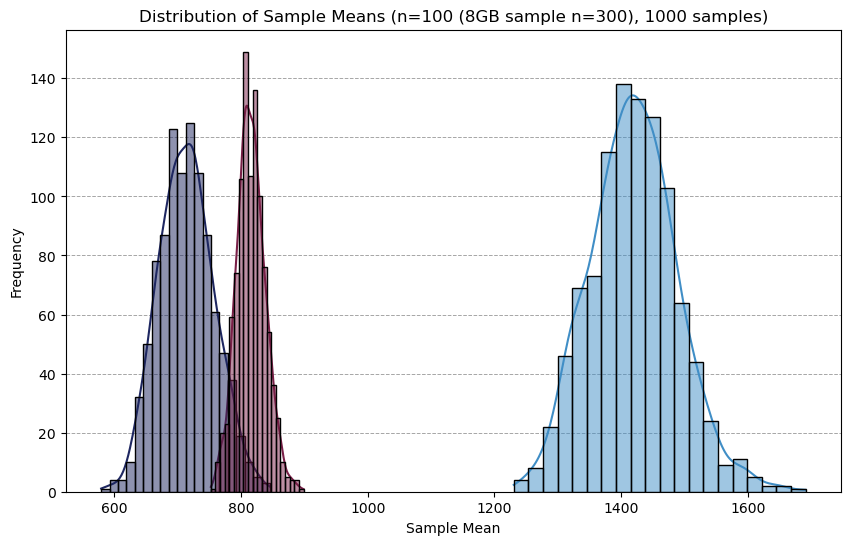

In [1048]:
#Slice main DF by each RAM amount type and only include the USD value.
gb4_data = clean_df[clean_df['ram_gb'] == "4 GB"]['latest_price_usd'].values
gb8_data = clean_df[clean_df['ram_gb'] == "8 GB"]['latest_price_usd'].values
gb16_data = clean_df[clean_df['ram_gb'] == "16 GB"]['latest_price_usd'].values

# Parameters for sampling
sample_size = 100  
num_samples = 1000 

# Generate sample means
gb4_sample_means = generate_sample_means(gb4_data, sample_size, num_samples)
gb8_sample_means = generate_sample_means(gb8_data, sample_size + 200, num_samples)
gb16_sample_means = generate_sample_means(gb16_data, sample_size, num_samples)

# Plot the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(gb4_sample_means, kde=True, color='#1E2761', bins=20, zorder=3)
sns.histplot(gb8_sample_means, kde=True, color='#7A2048', alpha=0.5, bins=20, zorder=3)
sns.histplot(gb16_sample_means, kde=True, color='#408EC6', bins=20, zorder=3)


#Customize the plot and label axis.
plt.title(f'Distribution of Sample Means (n={sample_size} (8GB sample n=300), {num_samples} samples)')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, color='gray', alpha=0.7, zorder=1)

plt.show()

In [1049]:
# Shapiro-Wilk test for normality

#Test for 4 GB samples
_, p_value_one = stats.shapiro(gb4_sample_means)
print(p_value_one)

if p_value_one> 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).\n")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).\n")

#Test for 8GB samples
_, p_value_two = stats.shapiro(gb8_sample_means)
print(p_value_two)

if p_value_two > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).\n")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).\n")

#Test for 16GB samples
    _, p_value_three = stats.shapiro(gb16_sample_means)
print(p_value_three)

if p_value_three > 0.05:
    print("The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).")
else:
    print("The sample means are not normally distributed (reject the null hypothesis of normality).")



0.3110477924346924
The sample means are approximately normally distributed (fail to reject the null hypothesis of normality).

0.002336343051865697
The sample means are not normally distributed (reject the null hypothesis of normality).

0.0018762190593406558
The sample means are not normally distributed (reject the null hypothesis of normality).


In [1055]:
# ANOVA Test to determine if samples are significantly different.
stat, p_value = f_oneway(gb4_sample_means, gb8_sample_means, gb16_sample_means)
print(p_value)

#Interpret results
test_outcome(p_value, alpha)

0.0


'Reject the null hypothesis.'

### **<u>Interpretation</u>**

Based on our test outcome, we have found that our Null hypothesis was not true and there is a statistical significance between the means of each group, therefore warranting further research.


<div style="
    background-color: #FCF6F5; 
    border: 2px solid #ccc; 
    padding: 10px; 
    font-family: 'Georgia', serif; 
    font-size: 30px; 
    text-align: left;
    color: #990011;
">
    Section 4: Analysis and Conclusions
</div>